In [1]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


Производим загрузку датасета и его вывод для контроля

In [2]:
import pandas as pd
# df=pd.read_csv('sample_submission.csv')
# df=pd.read_csv('test.csv')
df=pd.read_csv('train.csv')
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

Смотрим какие есть признаки и какого они типа. Есть много признаков разных типов. Принимаем решение пока не менять типы признаков

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Обнаруживаем какие признаки и в скольки строках не имеют значения 

In [4]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

Заполняем пропуски медианными значениями - по инструкции из семинара

In [5]:
mean_v=df['LotFrontage'].mean()
df['LotFrontage']=df['LotFrontage'].fillna(mean_v)

Проверяем результат. Пропусков нет

In [6]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

Проверяем наличие дублей. Дубли не обнаружены

In [7]:
df[df.duplicated()]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 81 columns]

(array([ 2.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  2.,  1.,  0.,  0.,
         1.,  3.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  3.,  0.,  2.,  0.,
         0.,  0.,  1.,  1.,  0.,  1.,  2.,  1.,  1.,  3.,  3.,  5.,  3.,
         6.,  3.,  1.,  8.,  5.,  4.,  5.,  0.,  4.,  4.,  6.,  1.,  4.,
         3.,  4.,  0.,  5.,  1.,  5.,  1., 10.,  1.,  4.,  3.,  2.,  7.,
         5.,  3.,  7.,  9.,  8., 18.,  2.,  7.,  8.,  0., 15.,  0.,  5.,
         7., 11., 14., 10.,  5.,  6.,  7.,  8.,  6., 14.,  5., 15., 12.,
        10., 20.,  6., 10., 13.,  4.,  8., 21., 11., 14.,  4., 15., 27.,
         8.,  5.,  5., 15., 14., 17.,  5., 11.,  8.,  8., 13.,  8.,  2.,
         6.,  8.,  9., 15.,  6.,  8., 10.,  6., 18.,  1.,  5.,  5.,  8.,
         7., 13.,  6.,  4., 10.,  6.,  3.,  9.,  6.,  9.,  9.,  9., 11.,
        13.,  9., 10.,  3., 10., 19.,  9.,  2.,  3.,  7., 12.,  5.,  6.,
         8.,  5.,  6., 14.,  4.,  6.,  5.,  7.,  7.

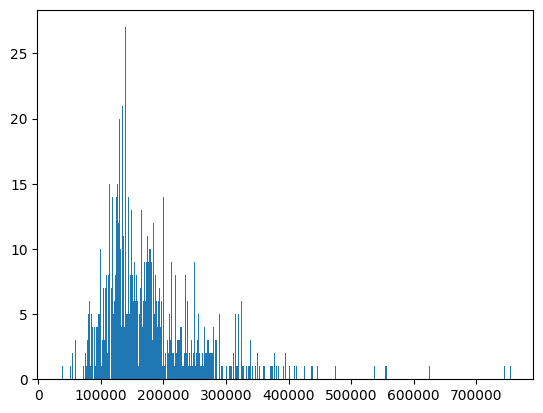

In [8]:
import matplotlib.pyplot as plt

plt.hist(df['SalePrice'], bins=800)

<Axes: xlabel='SalePrice', ylabel='Count'>

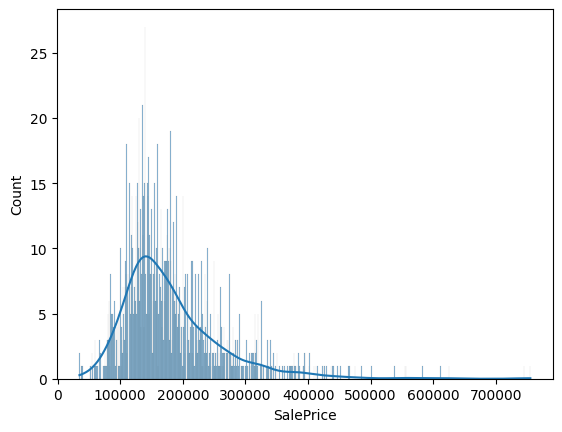

In [9]:
import seaborn as sns
sns.histplot(df['SalePrice'], bins=800, kde=True)

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000], dtype=int64)),
 (74160.16474519415, 180921.19589041095, 0.9319665641512986))

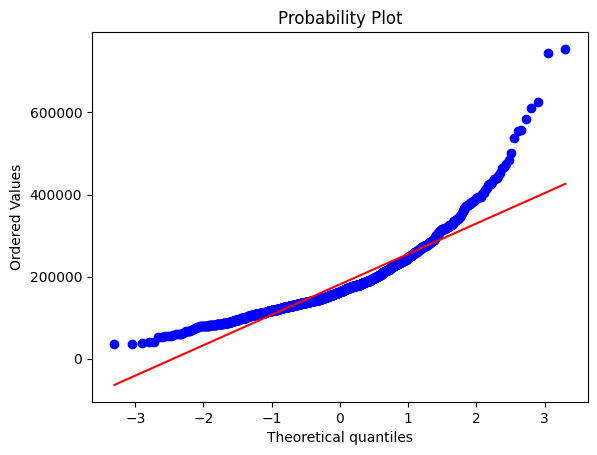

In [10]:
import scipy.stats as stats
stats.probplot(df['SalePrice'], dist="norm", plot=plt)

In [11]:
from scipy.stats import shapiro

# Тест Шапиро-Уилка
stat, p = shapiro(df['SalePrice'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Интерпретация результата
if p > 0.05:
    print("Данные распределены нормально")
else:
    print("Данные не распределены нормально")


Statistics=0.870, p=0.000
Данные не распределены нормально


Тест Шапиро-Уилка показывает что данные не распределены нормально, но возможно это связано с выбросами, например для цен выше 300000. По гистограмме видно что график бриобритет колоколообразный вид если отбросить данные c ценами > 300000. Интересно сколько этих значений(какой процент) и как измениться распределение если отброситть эти данные?


In [12]:
df[(df['SalePrice']>300000)|(df['SalePrice']<80000)].shape[0]*100/df.shape[0]

10.273972602739725

Statistics=0.962, p=0.000
Данные не распределены нормально


((array([-3.27377799, -3.01428586, -2.86983846, ...,  2.86983846,
          3.01428586,  3.27377799]),
  array([ 80500,  81000,  81000, ..., 295493, 297000, 299800], dtype=int64)),
 (49037.73808268696, 167202.63323124044, 0.981419086689506))

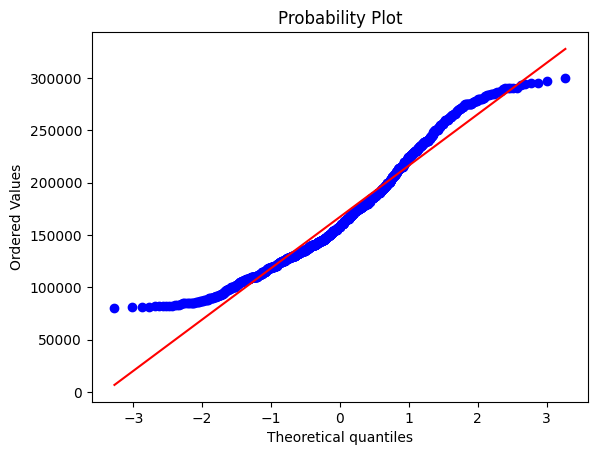

In [13]:
normal_df=df[(df['SalePrice']<300000)&(df['SalePrice']>80000)]
# Тест Шапиро-Уилка
stat, p = shapiro(normal_df['SalePrice'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Интерпретация результата
if p > 0.05:
    print("Данные распределены нормально")
else:
    print("Данные не распределены нормально")

stats.probplot(normal_df['SalePrice'], dist="norm", plot=plt)

Отбросили 10% данных, но нет нормальности! Что ж, продолжим отбрасывать!

In [14]:
df[(df['SalePrice']>250000)|(df['SalePrice']<100000)]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
11      12          60       RL         85.0    11924   Pave   NaN      IR1   
13      14          20       RL         91.0    10652   Pave   NaN      IR1   
17      18          90       RL         72.0    10791   Pave   NaN      Reg   
20      21          60       RL        101.0    14215   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1442  1443          60       FV         85.0    11003   Pave   NaN      Reg   
1449  1450         180       RM         21.0     1533   Pave   NaN      Reg   
1451  1452          20       RL         78.0     9262   Pave   NaN      Reg   
1453  1454          20       RL         90.0    17217   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
6            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
11           Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
13           Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
17           Lvl    AllPub  ...        0    NaN    NaN        Shed     500   
20           Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1442         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1449         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1451         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1453         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
6         8   2007        WD         Normal     307000  
11        7   2006       New        Partial     345000  
13        8   2007       New        Partial     279500  
17       10   2006        WD         Normal      90000  
20       11   2006       New        Partial     325300  
...     ...    ...       ...            ...        ...  
1442      4   2009        WD         Normal     310000  
1449      8   2006        WD        Abnorml      92000  
1451      5   2009       New        Partial     287090  
1453      7   2006        WD        Abnorml      84500  
1457      5   2010        WD         Normal     266500  

[331 rows x 81 columns]

In [15]:
df[(df['SalePrice']>250000)|(df['SalePrice']<100000)].shape[0]*100/df.shape[0]

22.671232876712327

ХА! 23%! Отбросим эти строки

Statistics=0.958, p=0.000
Данные не распределены нормально


((array([-3.22807129, -2.96517721, -2.81862005, ...,  2.81862005,
          2.96517721,  3.22807129]),
  array([101000, 101800, 102000, ..., 248328, 248900, 249700], dtype=int64)),
 (36649.128167969044, 162830.74370503597, 0.9797002333892941))

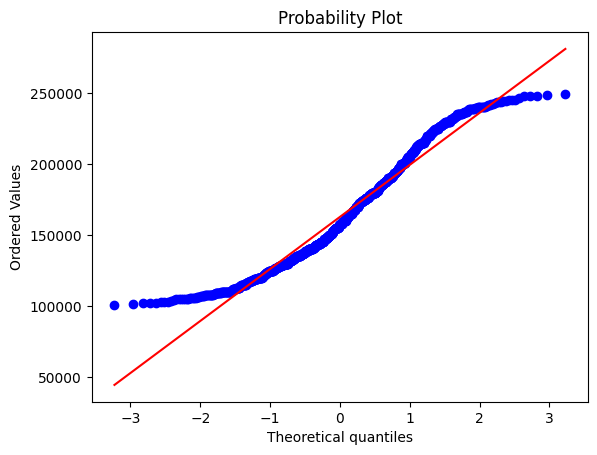

In [16]:
normal_df=df[(df['SalePrice']<250000)&(df['SalePrice']>100000)]
# Тест Шапиро-Уилка
stat, p = shapiro(normal_df['SalePrice'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Интерпретация результата
if p > 0.05:
    print("Данные распределены нормально")
else:
    print("Данные не распределены нормально")

stats.probplot(normal_df['SalePrice'], dist="norm", plot=plt)

Данные так и не расперделились нормально! Хотя мы отбросили почти 20% данных, но тест Шапиро-Уилка говорит НЕТ! Теория учит, что распределение цен на рынке недвижки должно происходить нормально но в данном случае этого не происходит! Наверное есть какие-то причины. Давайте изучим

(array([ 5.,  2.,  3.,  7.,  6.,  5., 11.,  6., 22.,  2.,  9.,  6.,  3.,
        12.,  6.,  6., 20., 15.,  5.,  6.,  7.,  8., 16.,  8., 16., 12.,
        14., 19.,  7., 13., 10., 10., 25., 12., 11., 15., 27.,  8.,  6.,
        16., 17., 17.,  5., 12., 10., 10., 11.,  7.,  9., 12., 17.,  6.,
         8., 10.,  6., 19.,  4.,  6.,  8.,  8., 16.,  2., 10.,  7., 15.,
         5.,  4., 14., 10., 11., 13.,  9., 11., 10., 21.,  9.,  2.,  4.,
         8., 14.,  7., 11.,  8., 14.,  4.,  6.,  5.,  7.,  8.,  5.,  6.,
         4.,  1., 15.,  4.,  5.,  4.,  8.,  2.,  4.,  5.,  4.,  6.,  2.,
         3.,  8.,  6., 10.,  2.,  4.,  1.,  4.,  7.,  4.,  3.,  4.,  9.,
         3.,  4.,  4.,  5.,  9.,  2.,  4.,  3.,  2.,  8.,  4.,  4.,  6.,
        10.,  1.,  4.,  1.,  3.,  4.,  1.,  1.,  3.,  2.]),
 array([101000.        , 102062.14285714, 103124.28571429, 104186.42857143,
        105248.57142857, 106310.71428571, 107372.85714286, 108435.        ,
        109497.14285714, 110559.28571429, 111621.42857143,

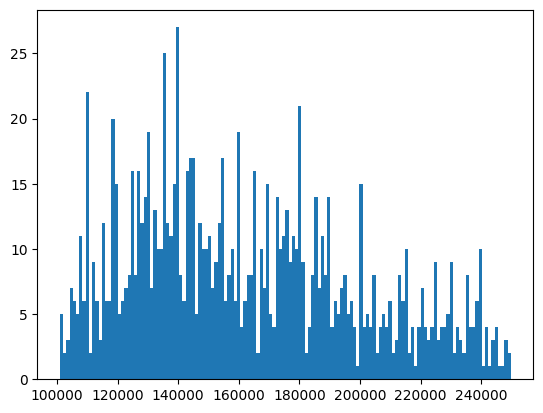

In [17]:
plt.hist(normal_df['SalePrice'], bins=140)

Создается впечатление, что есть несколько пиков или нормальных распределений на этом графике, т.е. присутствует несколько подгрупп внутри которых имеет место нормальное распределение

<Axes: xlabel='SalePrice', ylabel='Count'>

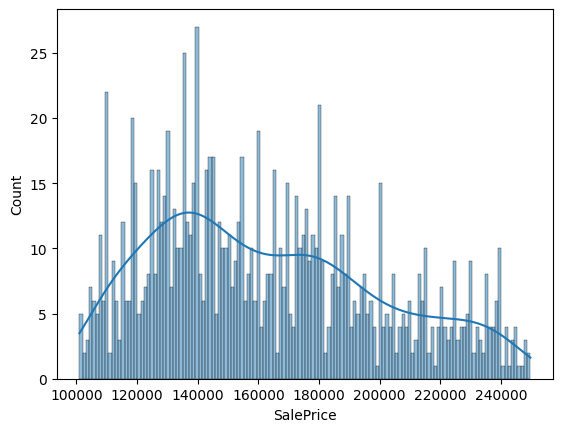

In [18]:
sns.histplot(normal_df['SalePrice'], bins=140, kde=True)

<Axes: xlabel='SalePrice', ylabel='Density'>

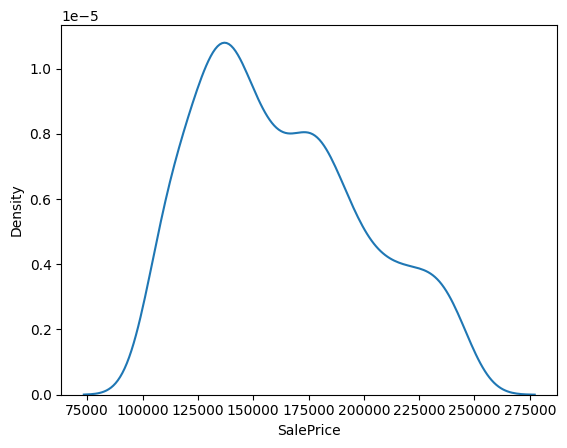

In [19]:
sns.kdeplot(normal_df['SalePrice'])

На данном ядерном графике видим 4 таких "ступеньки" - предположим что это отдельные группы данных - нормально распределенные внутри и имеющие отличия между собой! На глаз разделим всн данные на 4 группы: 1)80000-160000, 2)160000-230000, 3)230000-250000, 4)250000-300000

Данные не распределены нормально


C:\Users\User\AppData\Local\Temp\ipykernel_5908\1661054918.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for cat,group in df.groupby('PriceCat'):


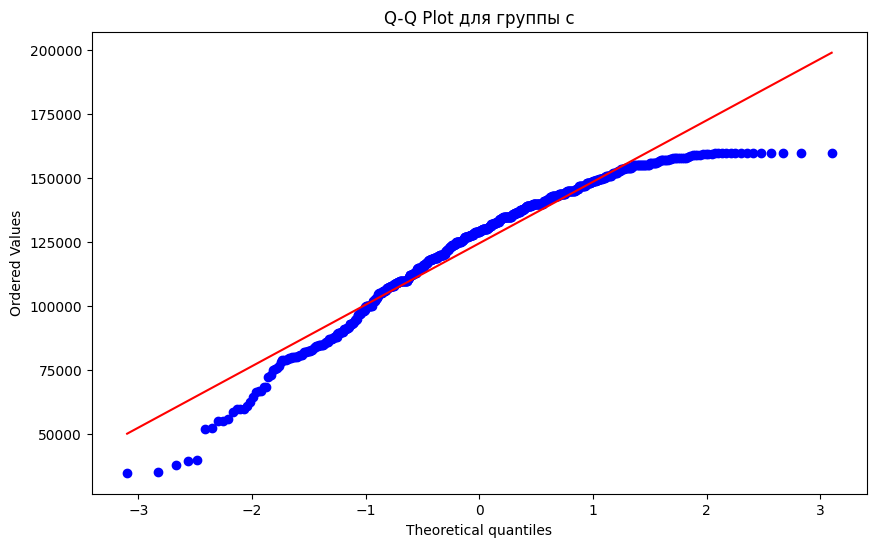

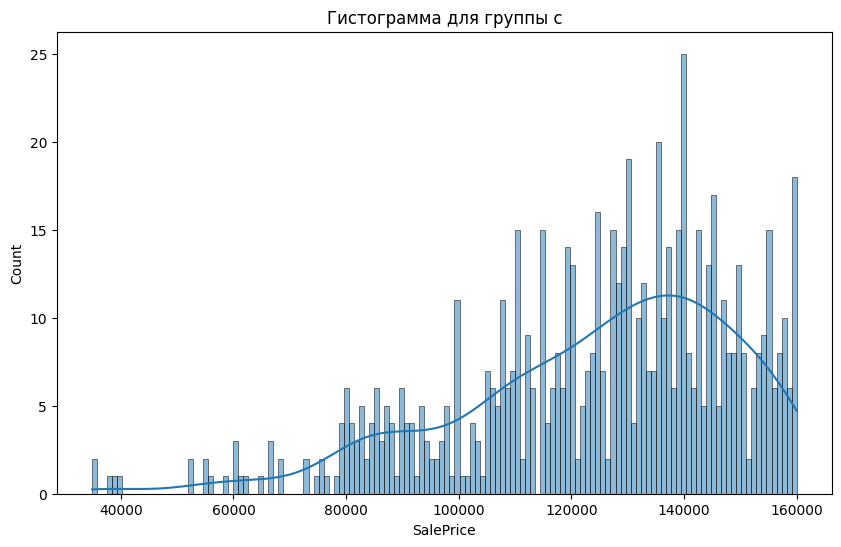

Данные не распределены нормально


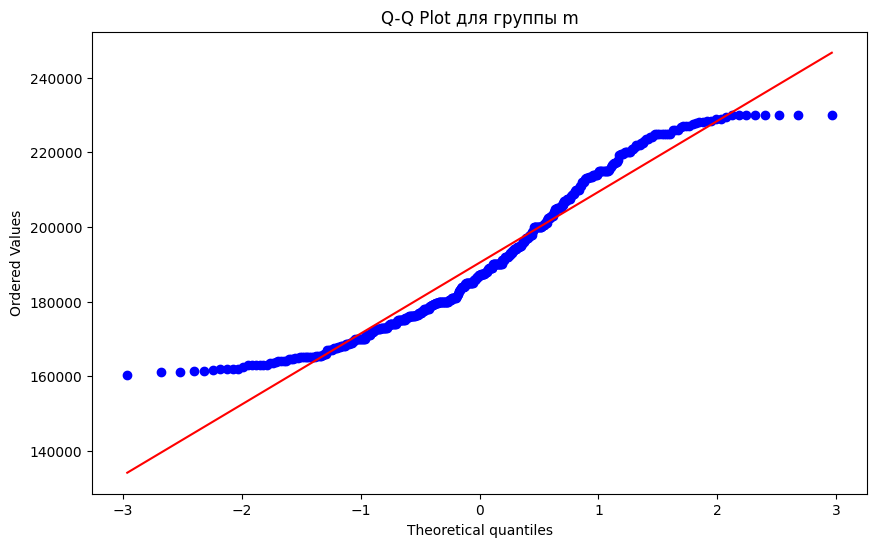

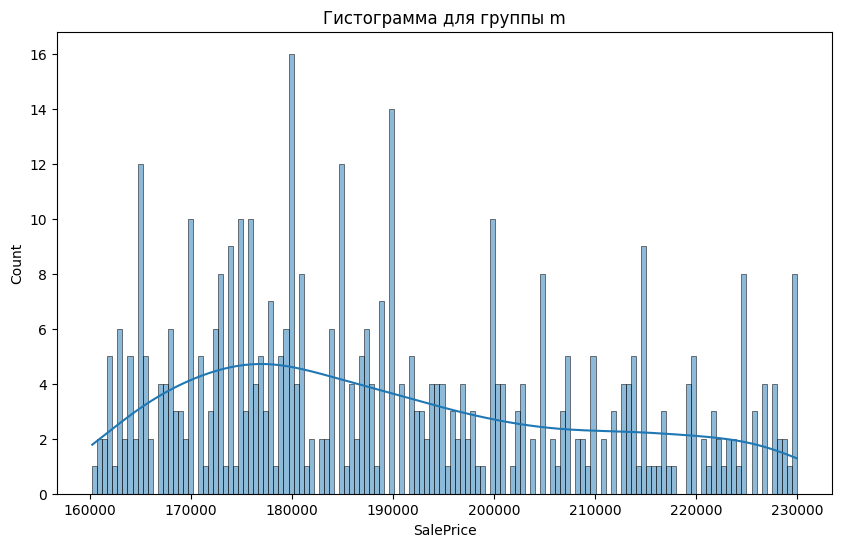

Данные не распределены нормально


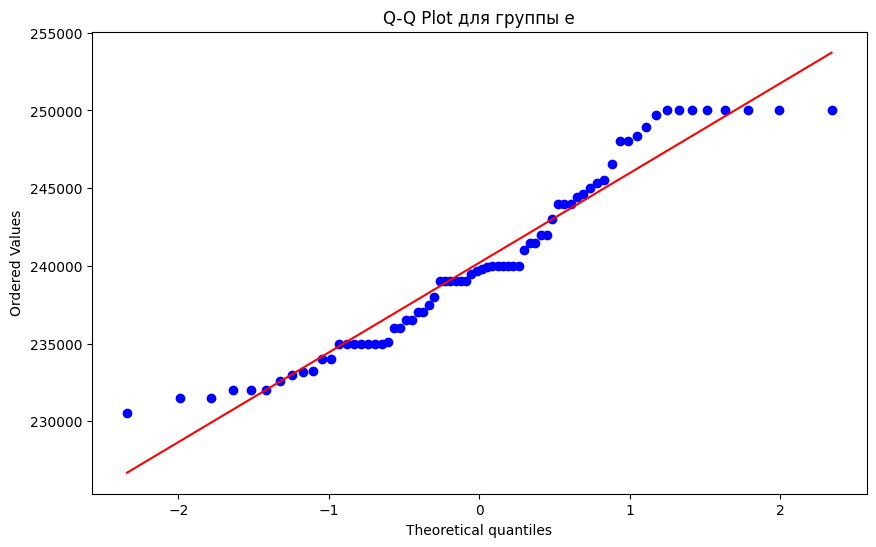

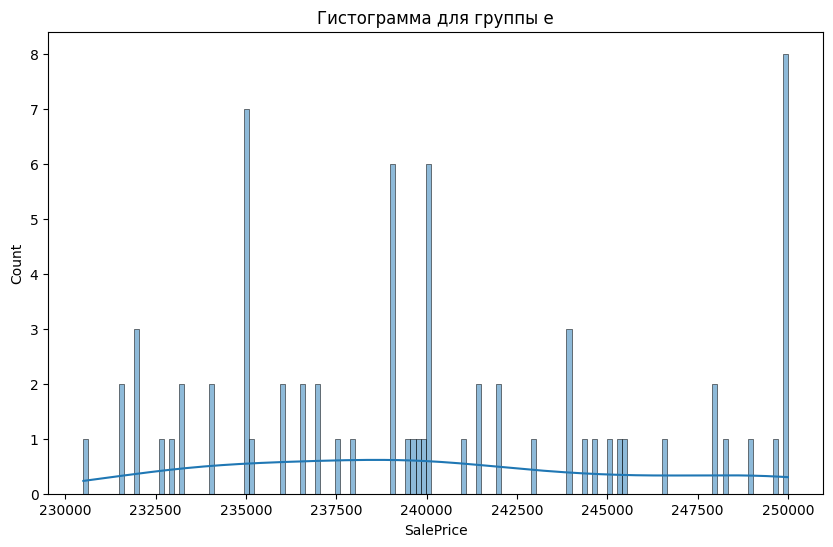

Данные не распределены нормально


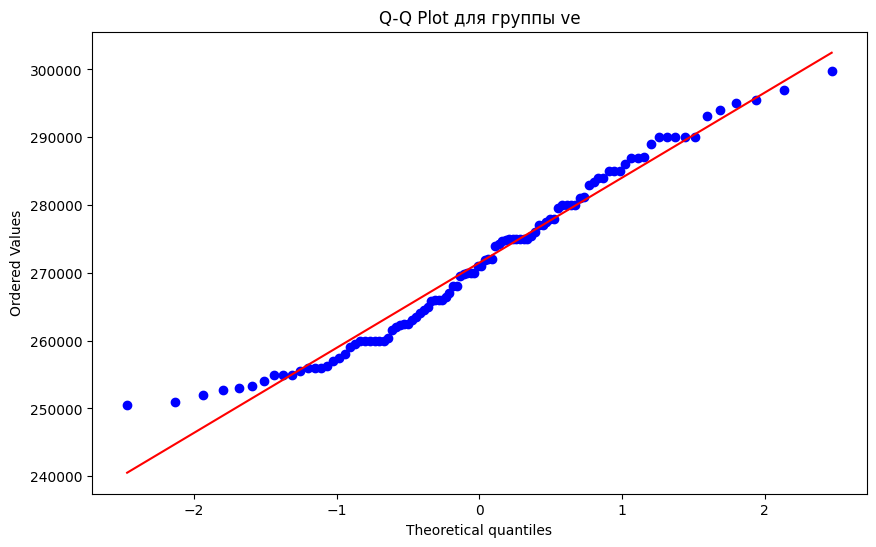

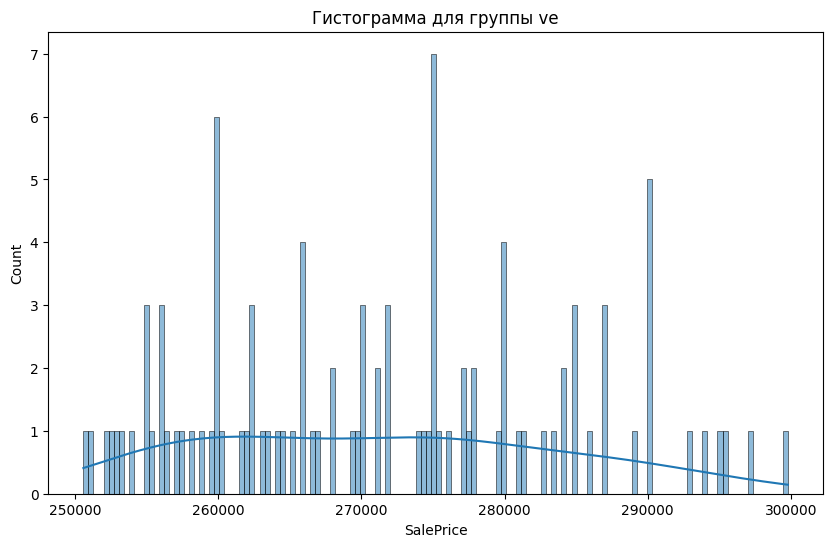

In [20]:

# Создание диапазонов цен
bins = [0, 160000, 230000, 250000, 300000]
labels = ['c', 'm', 'e', 've']

df['PriceCat'] = pd.cut(df['SalePrice'], bins=bins, labels=labels)

# Построение графиков по каждой группе
for cat,group in df.groupby('PriceCat'):
    # Тест Шапиро-Уилка
    stat, p = shapiro(group['SalePrice'])
    # print('Statistics=%.3f, p=%.3f' % (stat, p))
    
    # Интерпретация результата
    if p > 0.05:
        print("Данные распределены нормально")
    else:
        print("Данные не распределены нормально")
    
    plt.figure(figsize=(10, 6))  # Создание новой фигуры
    stats.probplot(group['SalePrice'], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot для группы {cat}')
    plt.show()  # Отображение Q-Q графика
    
    # Построение гистограммы с KDE
    plt.figure(figsize=(10, 6))  # Создание новой фигуры
    sns.histplot(group['SalePrice'], bins=140, kde=True)
    plt.title(f'Гистограмма для группы {cat}')
    plt.show()  # Отображение гистограммы

Ну что ж, - мы попытались!

Попробуем убрать выбросы не наглазок а по методике представленной на семинаре:

In [21]:
from scipy import stats
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler

z_score=stats.zscore(df['SalePrice'])
z_score
treshold=3
outliers=df['SalePrice'][z_score>treshold]
outliers
df.loc[z_score>treshold,'SalePrice']=df['SalePrice'].median()

(array([ 3.,  2.,  0.,  0.,  2.,  3.,  5.,  2.,  5.,  1.,  5., 12., 13.,
        22., 14., 12., 12., 18., 20., 39., 20., 35., 35., 39., 46., 43.,
        56., 54., 54., 34., 29., 39., 42., 45., 35., 25., 40., 38., 37.,
        30., 33., 25., 19., 21., 19., 14., 18., 21., 13., 20., 13., 18.,
        17., 20.,  9.,  6., 15.,  9.,  8., 14.,  9.,  8.,  7., 15.,  7.,
         7.,  5.,  6.,  4.,  2.,  4.,  4.,  6.,  8., 11.,  1.,  7.,  2.,
         4.,  3.,  5.,  2.,  3.,  1.,  0.,  3.,  0.,  1.,  4.,  2.,  5.,
         1.,  3.,  1.,  5.,  0.,  3.,  0.,  1.,  2.]),
 array([ 34900.  ,  38703.98,  42507.96,  46311.94,  50115.92,  53919.9 ,
         57723.88,  61527.86,  65331.84,  69135.82,  72939.8 ,  76743.78,
         80547.76,  84351.74,  88155.72,  91959.7 ,  95763.68,  99567.66,
        103371.64, 107175.62, 110979.6 , 114783.58, 118587.56, 122391.54,
        126195.52, 129999.5 , 133803.48, 137607.46, 141411.44, 145215.42,
        149019.4 , 152823.38, 156627.36, 160431.34, 164235.32, 1

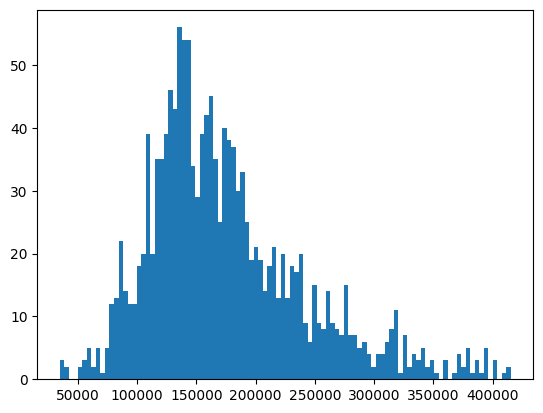

In [22]:
plt.hist(df['SalePrice'], bins=100)

<Axes: xlabel='SalePrice', ylabel='Count'>

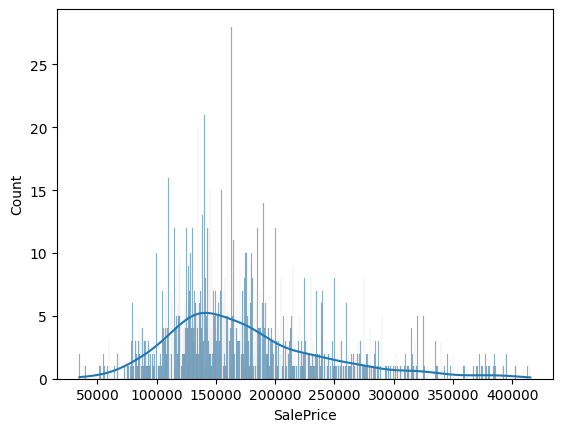

In [23]:
sns.histplot(df['SalePrice'], bins=800, kde=True)

Statistics=0.936, p=0.000
Данные не распределены нормально


((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 410000, 412500, 415298], dtype=int64)),
 (64920.77176413286, 175650.97465753424, 0.9676057637093725))

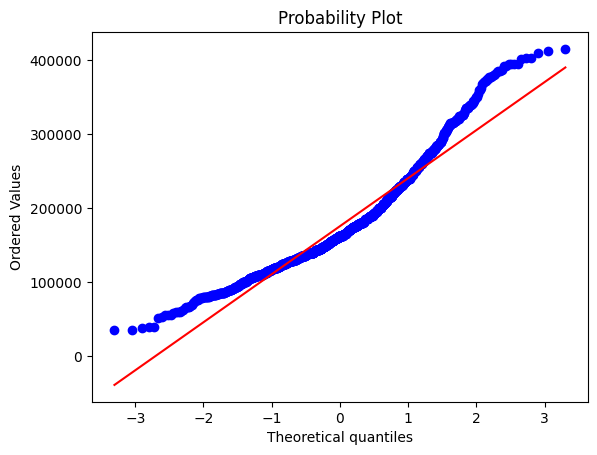

In [24]:
# Тест Шапиро-Уилка
stat, p = shapiro(df['SalePrice'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Интерпретация результата
if p > 0.05:
    print("Данные распределены нормально")
else:
    print("Данные не распределены нормально")

stats.probplot(df['SalePrice'], dist="norm", plot=plt)

Не получаем нормального распределения! Наверное, надо копать еще глубже или как-то по-другому!

Переходим к следующему пункту, а именно поищем связи всего со всем. Для этого подойдет матрица корреляций и визуализиркем ее спомощью тепловой карты
Но перед этим приведем строки и обьекты к числовому типу с помощью LabelEncoder()

In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in range(81):
    if df[df.columns[i]].dtype==object:
        print(df.columns[i],i)
        df[f'{df.columns[i]}_encode']=le.fit_transform(df[df.columns[i]])
        
numeric_df = df.select_dtypes(include=['number'])


numeric_df.head()

numeric_df.info()


MSZoning 2
Street 5
Alley 6
LotShape 7
LandContour 8
Utilities 9
LotConfig 10
LandSlope 11
Neighborhood 12
Condition1 13
Condition2 14
BldgType 15
HouseStyle 16
RoofStyle 21
RoofMatl 22
Exterior1st 23
Exterior2nd 24
MasVnrType 25
ExterQual 27
ExterCond 28
Foundation 29
BsmtQual 30
BsmtCond 31
BsmtExposure 32
BsmtFinType1 33
BsmtFinType2 35
Heating 39
HeatingQC 40
CentralAir 41
Electrical 42
KitchenQual 53
Functional 55
FireplaceQu 57
GarageType 58
GarageFinish 60
GarageQual 63
GarageCond 64
PavedDrive 65
PoolQC 72
Fence 73
MiscFeature 74
SaleType 78
SaleCondition 79
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    1460 non-null   int64  
 1   MSSubClass            1460 non-null   int64  
 2   LotFrontage           1460 non-null   float64
 3   LotArea               1460 non-null   int64  
 4   OverallQu

                            Id  MSSubClass  LotFrontage   LotArea  \
Id                    1.000000    0.011156    -0.009601 -0.033226   
MSSubClass            0.011156    1.000000    -0.357056 -0.139781   
LotFrontage          -0.009601   -0.357056     1.000000  0.306795   
LotArea              -0.033226   -0.139781     0.306795  1.000000   
OverallQual          -0.028365    0.032628     0.234196  0.105806   
...                        ...         ...          ...       ...   
PoolQC_encode        -0.033928   -0.005221    -0.191630 -0.065167   
Fence_encode         -0.000399    0.086360    -0.036751  0.036031   
MiscFeature_encode    0.037057    0.034859    -0.005395 -0.103544   
SaleType_encode       0.019773    0.012464    -0.030846  0.012292   
SaleCondition_encode -0.005806   -0.024940     0.058464  0.034169   

                      OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
Id                      -0.028365     0.012609  -0.012713     -0.021998   
MSSubClass           

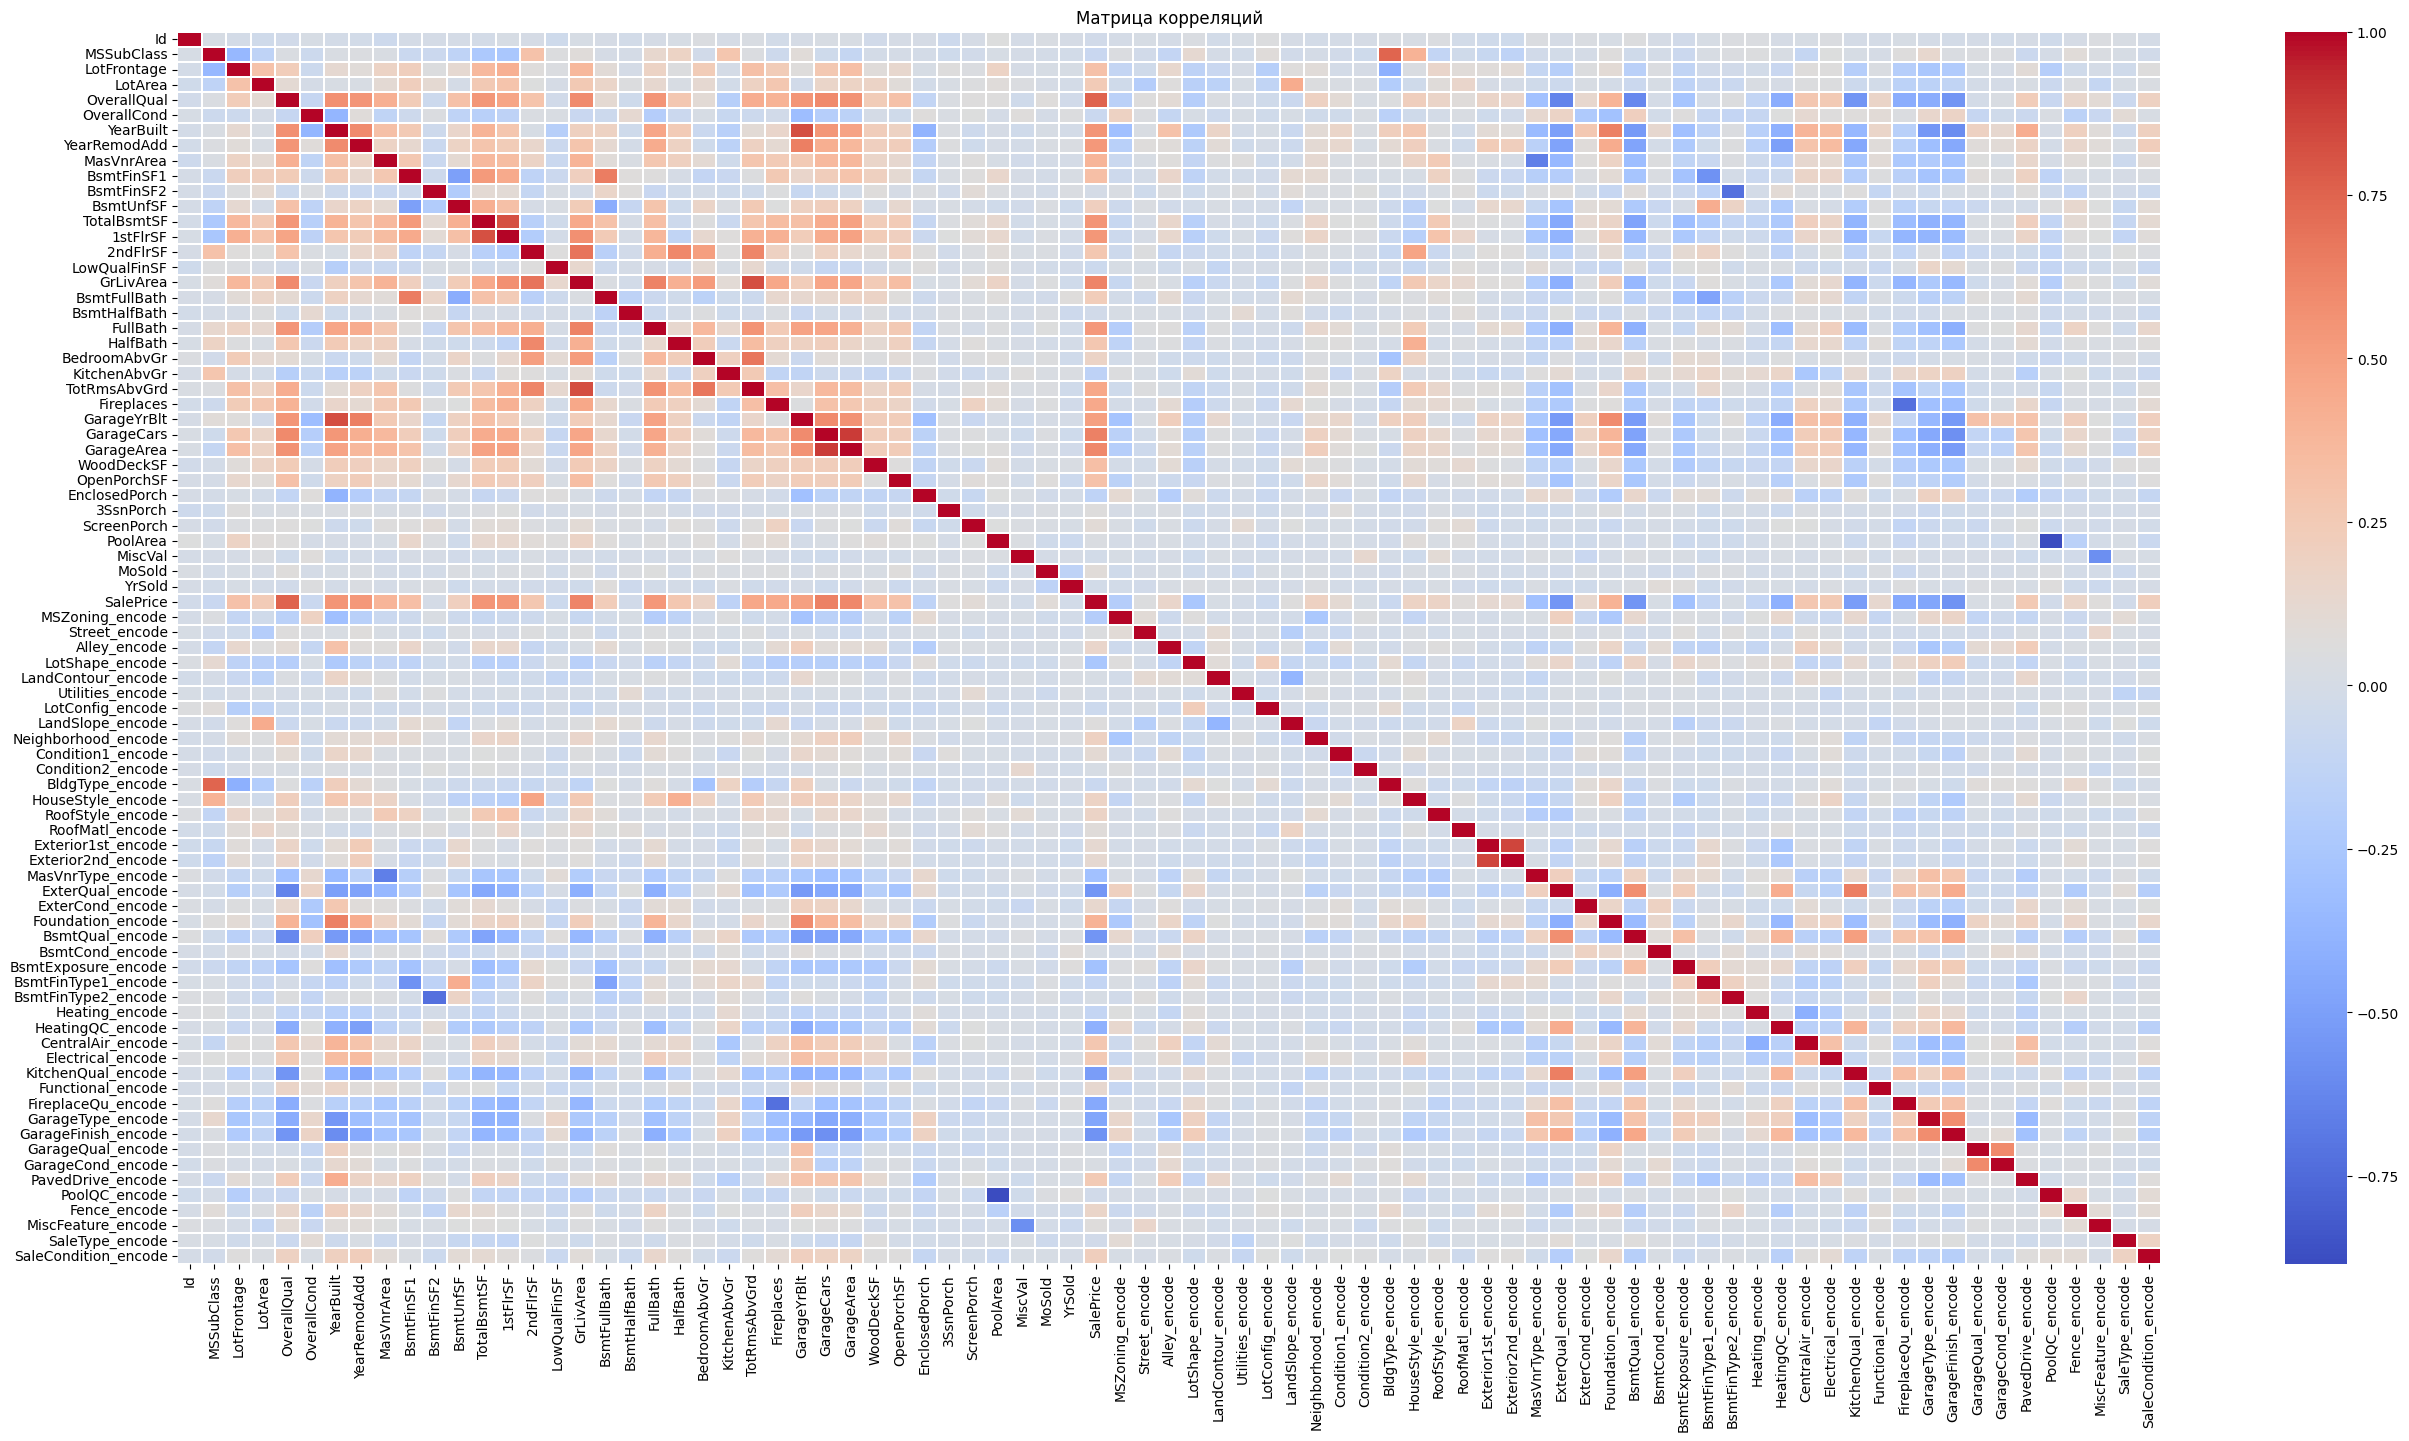

In [26]:
# Расчёт матрицы корреляций
corr_matrix =numeric_df.corr()

# Вывод матрицы корреляций
print(corr_matrix)

# Визуализация с помощью тепловой карты (heatmap)
plt.figure(figsize=(32, 16))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.2)
plt.title('Матрица корреляций')
plt.show()

получили слабую связь для следующих величин

In [27]:
weak_temp=[]
strong_temp=[]
v_strong_temp=[]
for i in range(corr_matrix.shape[0]):
    for j in range(corr_matrix.shape[1]):
        if j!=i:
            if ((corr_matrix.iloc[i,j]>0.5)and(corr_matrix.iloc[i,j]<0.7)):
                weak_temp.append([corr_matrix.index[i],corr_matrix.columns[j],corr_matrix.iloc[i,j]])
            elif ((corr_matrix.iloc[i,j]>0.7) and (corr_matrix.iloc[i,j]<0.9)):
                strong_temp.append([corr_matrix.index[i],corr_matrix.columns[j],corr_matrix.iloc[i,j]])
            elif corr_matrix.iloc[i,j]>0.9:
                v_strong_temp.append([corr_matrix.index[i],corr_matrix.columns[j],corr_matrix.iloc[i,j]])

weak_temp


[['OverallQual', 'YearBuilt', 0.5723227689623621],
 ['OverallQual', 'YearRemodAdd', 0.5506839241941717],
 ['OverallQual', 'TotalBsmtSF', 0.5378084986123907],
 ['OverallQual', 'GrLivArea', 0.5930074300286512],
 ['OverallQual', 'FullBath', 0.5505997093682543],
 ['OverallQual', 'GarageYrBlt', 0.5477658448351629],
 ['OverallQual', 'GarageCars', 0.6006707165907149],
 ['OverallQual', 'GarageArea', 0.5620217566126083],
 ['YearBuilt', 'OverallQual', 0.5723227689623621],
 ['YearBuilt', 'YearRemodAdd', 0.5928549763436519],
 ['YearBuilt', 'GarageCars', 0.5378500917111052],
 ['YearBuilt', 'SalePrice', 0.5483119741311074],
 ['YearBuilt', 'Foundation_encode', 0.6348419432638333],
 ['YearRemodAdd', 'OverallQual', 0.5506839241941717],
 ['YearRemodAdd', 'YearBuilt', 0.5928549763436519],
 ['YearRemodAdd', 'GarageYrBlt', 0.6422767797035356],
 ['YearRemodAdd', 'SalePrice', 0.5301364784677174],
 ['BsmtFinSF1', 'TotalBsmtSF', 0.5223960519923867],
 ['BsmtFinSF1', 'BsmtFullBath', 0.6492117535742649],
 ['Total

сильную связь для следующих величин. Т.е. можно ответитьт на вопрос, "Есть ли сильные связи", положительно!

In [28]:
strong_temp


[['MSSubClass', 'BldgType_encode', 0.7460629359877902],
 ['OverallQual', 'SalePrice', 0.7557140751323215],
 ['YearBuilt', 'GarageYrBlt', 0.8256674841743408],
 ['TotalBsmtSF', '1stFlrSF', 0.8195299750050339],
 ['1stFlrSF', 'TotalBsmtSF', 0.8195299750050339],
 ['GrLivArea', 'TotRmsAbvGrd', 0.8254893743088425],
 ['TotRmsAbvGrd', 'GrLivArea', 0.8254893743088425],
 ['GarageYrBlt', 'YearBuilt', 0.8256674841743408],
 ['GarageCars', 'GarageArea', 0.882475414281462],
 ['GarageArea', 'GarageCars', 0.882475414281462],
 ['SalePrice', 'OverallQual', 0.7557140751323215],
 ['BldgType_encode', 'MSSubClass', 0.7460629359877902],
 ['Exterior1st_encode', 'Exterior2nd_encode', 0.8541629837325787],
 ['Exterior2nd_encode', 'Exterior1st_encode', 0.8541629837325787]]

очень сильной связи между величинами не выявлено

In [29]:
v_strong_temp

[]

Еще изучим есть ли сильные связи с SalePrice. 
Слабых связей 8, а сильная только одна с OverallQual(отделка видимо)

In [30]:
w_temp=[]
s_temp=[]
vs_temp=[]
for i in range(corr_matrix.shape[1]):
    if corr_matrix.columns[i]!="SalePrice":
        if ((corr_matrix.loc["SalePrice",corr_matrix.columns[i]]>0.5)and(corr_matrix.loc["SalePrice",corr_matrix.columns[i]]<0.7)):
            w_temp.append([corr_matrix.columns[i],corr_matrix.loc["SalePrice",corr_matrix.columns[i]]])
        elif ((corr_matrix.loc["SalePrice",corr_matrix.columns[i]]>0.7) and (corr_matrix.loc["SalePrice",corr_matrix.columns[i]]<0.9)):
            s_temp.append([corr_matrix.columns[i],corr_matrix.loc["SalePrice",corr_matrix.columns[i]]])
        elif corr_matrix.loc["SalePrice",corr_matrix.columns[i]]>0.9:
            vs_temp.append([corr_matrix.columns[i],corr_matrix.loc["SalePrice",corr_matrix.columns[i]]])

w_temp

[['YearBuilt', 0.5483119741311074],
 ['YearRemodAdd', 0.5301364784677174],
 ['TotalBsmtSF', 0.5480983086458171],
 ['1stFlrSF', 0.5385097408342268],
 ['GrLivArea', 0.6195963872927381],
 ['FullBath', 0.534232781019581],
 ['GarageCars', 0.6332922362063937],
 ['GarageArea', 0.604203305845861]]

In [31]:
s_temp

[['OverallQual', 0.7557140751323215]]

построим графики зависимости цены от велечин OverallQual,GarageCars,GarageArea,GrLivArea

In [32]:
app=df[['OverallQual','SalePrice','GarageCars','GarageArea','GrLivArea']]
app

OverallQual  SalePrice  GarageCars  GarageArea  GrLivArea
0               7     208500           2         548       1710
1               6     181500           2         460       1262
2               7     223500           2         608       1786
3               7     140000           3         642       1717
4               8     250000           3         836       2198
...           ...        ...         ...         ...        ...
1455            6     175000           2         460       1647
1456            6     210000           2         500       2073
1457            7     266500           1         252       2340
1458            5     142125           1         240       1078
1459            5     147500           1         276       1256

[1460 rows x 5 columns]

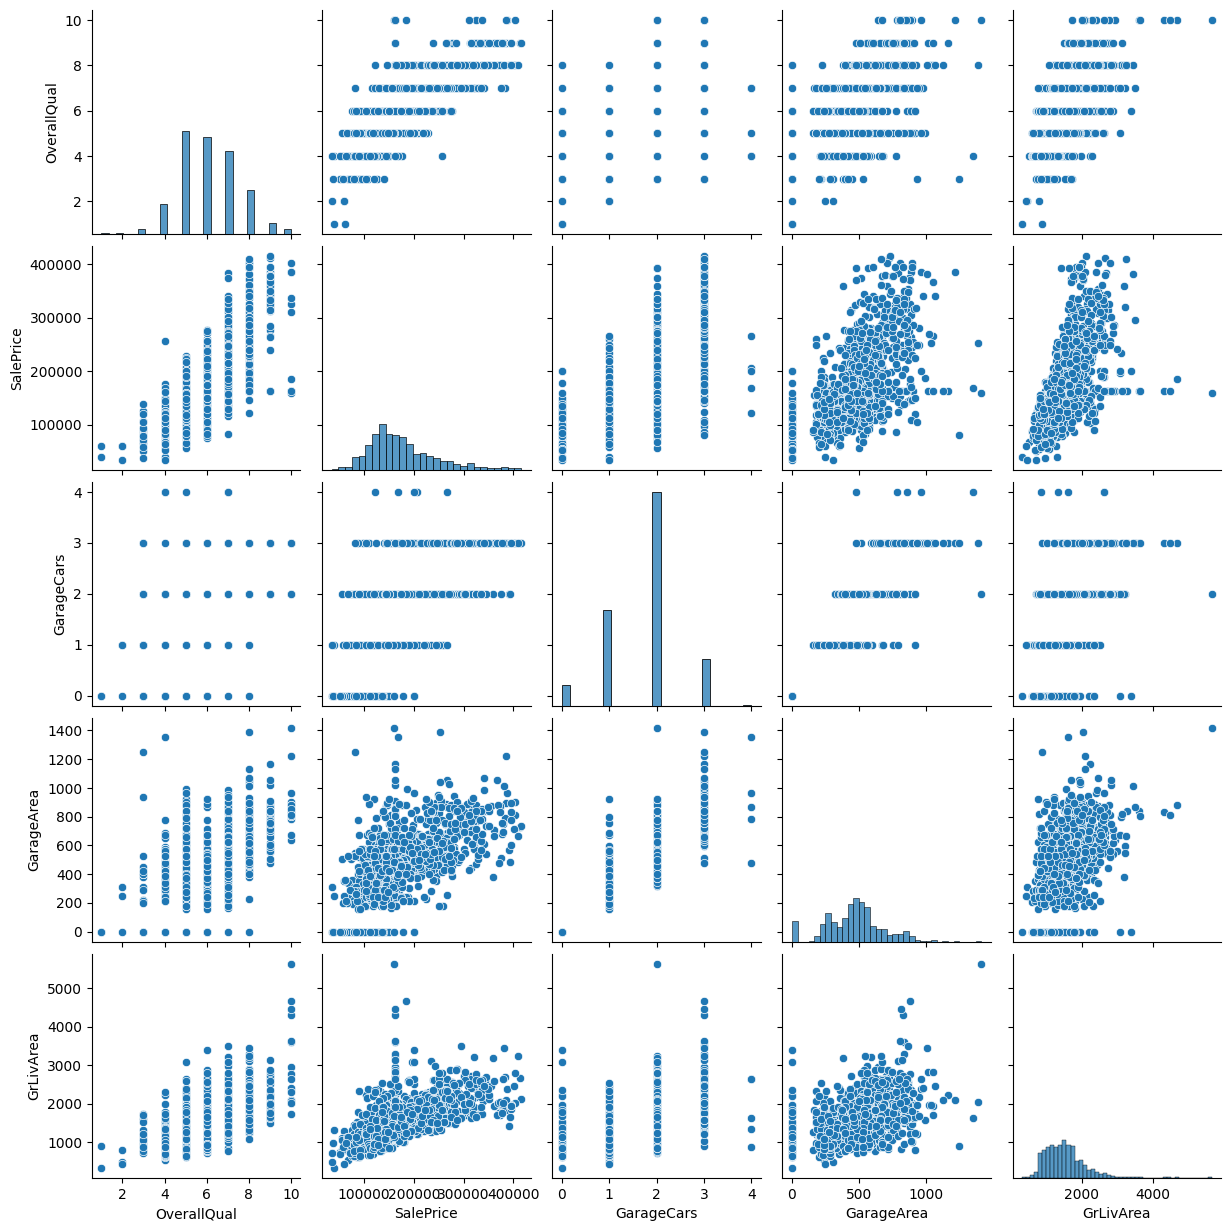

In [33]:
import seaborn as sns
sns.pairplot(app)

Наблюдаем зависимости. OverallQual и GarageCars это категориальные величины - 10 для первой и 5 для второй. Для OverallQual отчетливо видим, что чем выше категория тем больше дорогих и меньше дешевых. Такая же тенденция наблюдается и в случае GarageCars. Для GarageArea и GrLivArea видим что тучи точек всеже имеют направление сонаправленное с прямой пропорциональностью, что говорит о прямой связи - чем больше GarageArea и GrLivArea - тем выше цена

Построим столбчатую диаграмму

<BarContainer object of 6 artists>

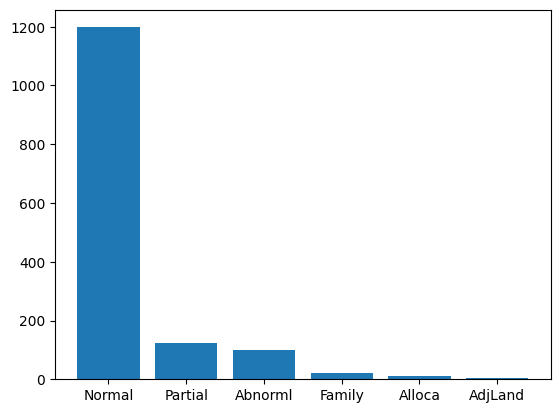

In [34]:
temp=df['SaleCondition'].value_counts()
plt.bar(temp.index,temp.values) 

In [35]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [36]:
pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


In [37]:
import plotly.io as pio
pio.renderers.default = 'notebook'



In [38]:
import plotly.express as px
# Группировка данных по 'HouseStyle' и подсчет количества строк в каждой группе
grouped_counts = df.groupby('HouseStyle').size().reset_index(name='Count')
px.treemap(grouped_counts, path=['HouseStyle'], values='Count')
# grouped_counts

Не судьба

In [39]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


AttributeError: module 'matplotlib.cm' has no attribute 'get_cmap'

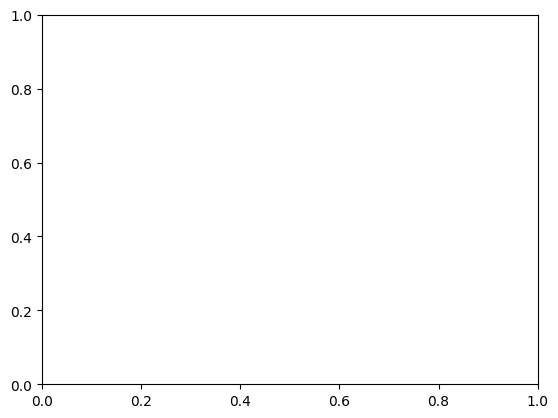

In [40]:
import squarify
squarify.plot(sizes=df['HouseStyle_encode'], label=df['HouseStyle'], alpha=0.7)
plt.axis('off')

Вот диаграмма рассеяния

In [41]:
px.scatter(df, x='OverallQual', y='SalePrice', title='Диаграмма рассеяния: Продажи vs Прибыль')


In [ ]:
Создали новый признак, путем объединения существующих характеристик

In [42]:
df['TotalLivingArea']=df['1stFlrSF']+df['2ndFlrSF']


In [48]:
df[['1stFlrSF','2ndFlrSF','TotalLivingArea']]

1stFlrSF  2ndFlrSF  TotalLivingArea
0          856       854             1710
1         1262         0             1262
2          920       866             1786
3          961       756             1717
4         1145      1053             2198
...        ...       ...              ...
1455       953       694             1647
1456      2073         0             2073
1457      1188      1152             2340
1458      1078         0             1078
1459      1256         0             1256

[1460 rows x 3 columns]

In [49]:
df.to_csv('cleaned_house_prices.csv', index=False)

In [50]:
temp=pd.read_csv('cleaned_house_prices.csv')
temp

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... GarageFinish_encode GarageQual_encode  \
0            Lvl    AllPub  ...                   1                 4   
1            Lvl    AllPub  ...                   1                 4   
2            Lvl    AllPub  ...                   1                 4   
3            Lvl    AllPub  ...                   2                 4   
4            Lvl    AllPub  ...                   1                 4   
...          ...       ...  ...                 ...               ...   
1455         Lvl    AllPub  ...                   1                 4   
1456         Lvl    AllPub  ...                   2                 4   
1457         Lvl    AllPub  ...                   1                 4   
1458         Lvl    AllPub  ...                   2                 4   
1459         Lvl    AllPub  ...                   0                 4   

     GarageCond_encode PavedDrive_encode PoolQC_encode Fence_encode  \
0                    4                 2             3            4   
1                    4                 2             3            4   
2                    4                 2             3            4   
3                    4                 2             3            4   
4                    4                 2             3            4   
...                ...               ...           ...          ...   
1455                 4                 2             3            4   
1456                 4                 2             3            2   
1457                 4                 2             3            0   
1458                 4                 2             3            4   
1459                 4                 2             3            4   

     MiscFeature_encode  SaleType_encode  SaleCondition_encode  \
0                     4                8                     4   
1                     4                8                     4   
2                     4                8                     4   
3                     4                8                     0   
4                     4                8                     4   
...                 ...              ...                   ...   
1455                  4                8                     4   
1456                  4                8                     4   
1457                  2                8                     4   
1458                  4                8                     4   
1459                  4                8                     4   

      TotalLivingArea  
0                1710  
1                1262  
2                1786  
3                1717  
4                2198  
...               ...  
1455             1647  
1456             2073  
1457             2340  
1458             1078  
1459             1256  

[1460 rows x 126 columns]